<a href="https://colab.research.google.com/github/wbjimmer/Machine-Learning/blob/main/week_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()

In [3]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
iris.data.shape

(150, 4)

In [5]:
iris.target.shape

(150,)

In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
import pandas as pd

In [9]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [10]:
iris_df['species'] = [iris.target_names[i] for i in iris.target]

In [11]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [12]:
pd.set_option('precision', 2)

In [13]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.00,150.00,150.00,150.00
mean,5.84,3.06,3.76,1.20
std,0.83,0.44,1.77,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.35,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


In [14]:
iris_df['species'].describe()

count        150
unique         3
top       setosa
freq          50
Name: species, dtype: object

In [15]:
import seaborn as sns

In [16]:
sns.set_style('whitegrid')

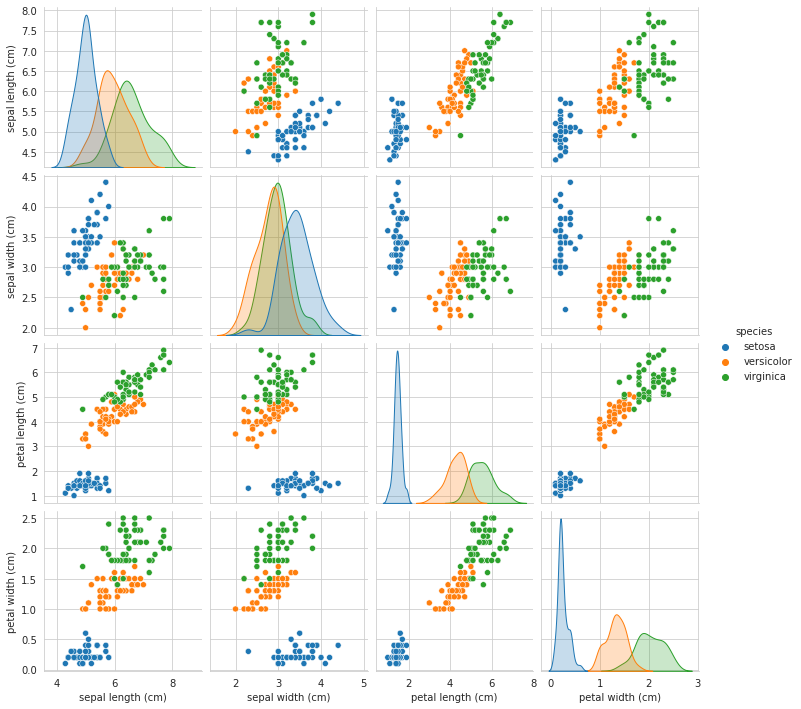

In [17]:
grid = sns.pairplot(data=iris_df, vars=iris_df.columns[0:4], hue='species')

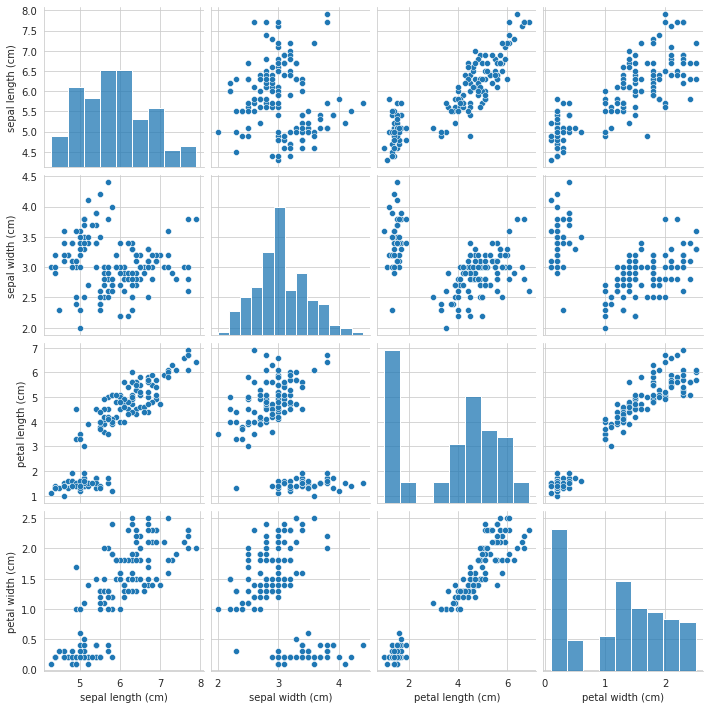

In [18]:
grid = sns.pairplot(data=iris_df, vars=iris_df.columns[0:4])

In [19]:
from sklearn.cluster import KMeans

In [20]:
kmeans = KMeans(n_clusters=3, random_state=11)

In [21]:
kmeans.fit(iris.data)

KMeans(n_clusters=3, random_state=11)

In [22]:
print(kmeans.labels_[0:50])

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [23]:
print(kmeans.labels_[50:100])

[0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [24]:
print(kmeans.labels_[100:150])

[2 0 2 2 2 2 0 2 2 2 2 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2
 2 0 2 2 2 0 2 2 2 0 2 2 0]


In [25]:
from sklearn.decomposition import PCA

In [26]:
pca = PCA(n_components=2, random_state=11)

In [27]:
pca.fit(iris.data)

PCA(n_components=2, random_state=11)

In [28]:
iris_pca = pca.transform(iris.data)

In [29]:
iris_pca.shape

(150, 2)

In [30]:
iris_pca_df = pd.DataFrame(iris_pca, 
                           columns=['Component1', 'Component2'])

In [31]:
iris_pca_df['species'] = iris_df.species

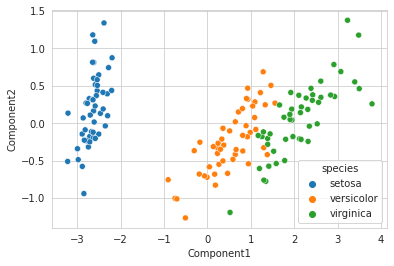

In [32]:
axes = sns.scatterplot(data=iris_pca_df, x='Component1', 
    y='Component2', hue='species', legend='brief') 

In [33]:
iris_centers = pca.transform(kmeans.cluster_centers_)

In [34]:
import matplotlib.pyplot as plt

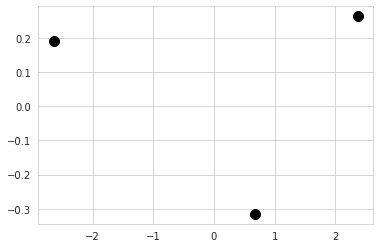

In [35]:
dots = plt.scatter(iris_centers[:,0], iris_centers[:,1], s=100, c='k')

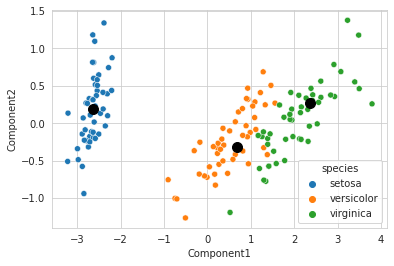

In [36]:
axes = sns.scatterplot(data=iris_pca_df, x='Component1', 
    y='Component2', hue='species', legend='brief') 

iris_centers = pca.transform(kmeans.cluster_centers_)

import matplotlib.pyplot as plt

dots = plt.scatter(iris_centers[:,0], iris_centers[:,1], s=100, c='k')

In [37]:
from sklearn.cluster import DBSCAN, MeanShift,\
    SpectralClustering, AgglomerativeClustering

In [38]:
estimators = {
    'KMeans': kmeans,
    'DBSCAN': DBSCAN(),
    'MeanShift': MeanShift(),
    'SpectralClustering': SpectralClustering(n_clusters=3),
    'AgglomerativeClustering': 
        AgglomerativeClustering(n_clusters=3)
}

In [39]:
import numpy as np

In [40]:
for name, estimator in estimators.items():
    estimator.fit(iris.data)
    print(f'\n{name}:')
    for i in range(0, 101, 50):
        labels, counts = np.unique(
            estimator.labels_[i:i+50], return_counts=True)
        print(f'{i}-{i+50}:')
        for label, count in zip(labels, counts):
            print(f'   label={label}, count={count}')     


KMeans:
0-50:
   label=1, count=50
50-100:
   label=0, count=48
   label=2, count=2
100-150:
   label=0, count=14
   label=2, count=36

DBSCAN:
0-50:
   label=-1, count=1
   label=0, count=49
50-100:
   label=-1, count=6
   label=1, count=44
100-150:
   label=-1, count=10
   label=1, count=40

MeanShift:
0-50:
   label=1, count=50
50-100:
   label=0, count=49
   label=1, count=1
100-150:
   label=0, count=50

SpectralClustering:
0-50:
   label=1, count=50
50-100:
   label=2, count=50
100-150:
   label=0, count=35
   label=2, count=15

AgglomerativeClustering:
0-50:
   label=1, count=50
50-100:
   label=0, count=49
   label=2, count=1
100-150:
   label=0, count=15
   label=2, count=35


In [41]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale

In [42]:
clustering = KMeans(n_clusters =3,random_state=1)

In [43]:
x = scale(iris.data)

In [44]:
clustering = KMeans(n_clusters =3,random_state=1)

In [45]:
clustering.fit(x)

KMeans(n_clusters=3, random_state=1)

In [46]:
clustering.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [47]:
iris_df = pd.DataFrame(iris.data)

In [48]:
iris_df.columns=['sepal_length','sepal_width','petal_length','petal_width']

In [49]:
y=pd.DataFrame(iris.target)
y.columns=['targets']

In [50]:
y.head()

,targets
0,0
1,0
2,0
3,0
4,0


In [51]:
distortions = []
K = range(1,18)
print(K)

range(1, 18)


In [52]:
from scipy.spatial.distance import cdist
import math
iris_df.head()
X = iris_df.loc[:,['petal_length','petal_width']]

In [53]:
for k in K: 
    kmeans_model = KMeans(n_clusters=k)
    kmeans_model.fit(X)
    distortions.append(sum(np.min(cdist(X,kmeans_model.cluster_centers_,"euclidean"),axis=1))/X.shape[0])

In [54]:
distortions

[1.707364436891335,
 0.583920126422277,
 0.36876646966749166,
 0.2992242581050885,
 0.26508349289751987,
 0.23304196341999167,
 0.21123869891294622,
 0.1952819559145633,
 0.18627458848741477,
 0.17060520127478893,
 0.16514822230026519,
 0.1584589158857023,
 0.1520135430357436,
 0.14517569960132937,
 0.13843647492494066,
 0.13027378312708968,
 0.12650063400172254]

range(1, 18)
0.12650063400172254


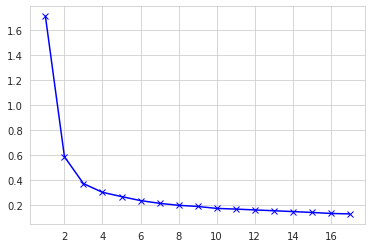

In [55]:
print(K)
# checking for min of K value
print(np.min(distortions))
#Plotting for change in K value
plt.plot(K,distortions,'bx-')

In [56]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, return_X_y=True)

In [57]:
mnist = fetch_openml('mnist_784')

In [58]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [59]:
mnist.target[::100]

0        5
100      5
200      1
300      8
400      2
        ..
69500    2
69600    5
69700    2
69800    0
69900    8
Name: class, Length: 700, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [60]:
mnist.data.shape

(70000, 784)

In [61]:
mnist.target.shape

(70000,)

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
X_train, X_test, y_train, y_test = train_test_split(
    mnist.data, mnist.target, random_state=11)

In [71]:
X_train.shape

(52500, 784)

In [72]:
X_test.shape

(17500, 784)

In [73]:
import numpy as nm 

In [86]:
X_train= x.fit_transform(X_train)    
X_test= x.transform(X_test)  

AttributeError: ignored

In [75]:
from sklearn.preprocessing import StandardScaler    

In [76]:
st_x= StandardScaler()    

In [77]:
from sklearn.decomposition import PCA

In [78]:
pca = PCA(n_components=2, random_state=11)

In [79]:
pca.fit(mnist.data)

PCA(n_components=2, random_state=11)

In [80]:
mnist_pca = pca.transform(mnist.data)

In [81]:
mnist_pca.shape

(70000, 2)

In [82]:
from sklearn.linear_model import LogisticRegression 

In [83]:
classifier= LogisticRegression(random_state=0)  

In [84]:
logisticRegr = LogisticRegression(solver = 'lbfgs')

In [85]:
classifier.fit(X_train, y_train)  

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(random_state=0)